# Play with Mbs and Bandpasses

In [1]:
# Using this file, we can use "import litebird_sim" even if it is not installed system-wide
import fixpythonpath

In [2]:
import litebird_sim as lbs
import numpy as np
import matplotlib.pylab as plt
import healpy as hp
import astropy

In [3]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

## One channel

In [4]:
# Initialize the channel
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)

In [5]:
# Parameters of Mbs
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)

In [6]:
# Create the class and run the map generation
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
maps = mbs.run_all()[0]

[2023-08-03 08:49:30,353 INFO MPI#0000] generating and saving fg simulations
[2023-08-03 08:49:30,356 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-03 08:49:30,371 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:30,372 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:30,373 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:30,526 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-03 08:49:30,529 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:30,530 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:30,530 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:30,704 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-03 08:49:30,707 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:30,708 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:30,710 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:33,543 INFO MPI#0000] Sigma is 13.079556 arc

In [7]:
maps.keys()

dict_keys(['M1-140', 'Coordinates', 'Mbs_parameters'])

In [8]:
# numpy array with the healpix map
maps["M1-140"].shape

(3, 49152)

In [9]:
# Coordinates of the simulated maps
maps["Coordinates"]

<CoordinateSystem.Galactic: 2>

In [10]:
# Parameters of the Mbs simulations
maps["Mbs_parameters"]

MbsParameters(nside=64, save=False, gaussian_smooth=True, bandpass_int=False, coadd=True, parallel_mc=False, make_noise=False, nmc_noise=1, seed_noise=None, n_split=False, make_cmb=False, cmb_ps_file='', cmb_r=0.0, nmc_cmb=1, seed_cmb=None, make_fg=True, fg_models={'pysm_synch_0': 'pysm_synch_0', 'pysm_freefree_1': 'pysm_freefree_1', 'pysm_dust_0': 'pysm_dust_0'}, make_dipole=False, sun_velocity=None, output_string='date_230803', units='K_CMB', maps_in_ecliptic=False)

## Many channels

In [11]:
# Obtain the info about the instrument from the imo
instrument = lbs.InstrumentInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/instrument_info", imo=imo
)

In [12]:
# Create a list with all the channels
channels = list()
for ch in instrument.channel_names:
    print(ch)
    channels.append(
        lbs.FreqChannelInfo.from_imo(
            url="/releases/v1.3/satellite/MFT/" + ch + "/channel_info", imo=imo
        )
    )

M1-100
M2-119
M1-140
M2-166
M1-195


In [13]:
# Same as before but using the uuids
channels = list()
for uuid in instrument.channel_objs:
    channel = lbs.FreqChannelInfo.from_imo(url=uuid, imo=imo)
    print(channel.channel)
    channels.append(channel)

M1-100
M2-119
M1-140
M2-166
M1-195


In [14]:
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channels,
)
maps = mbs.run_all()[0]

[2023-08-03 08:49:38,282 INFO MPI#0000] generating and saving fg simulations
[2023-08-03 08:49:38,284 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-03 08:49:38,287 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:38,288 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:38,288 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:38,420 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-03 08:49:38,423 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:38,424 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:38,425 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:38,565 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-03 08:49:38,568 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:38,569 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:38,570 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:38,916 INFO MPI#0000] Sigma is 16.052182 arc

In [15]:
for k in maps.keys():
    print(k)

M1-100
M2-119
M1-140
M2-166
M1-195
Coordinates
Mbs_parameters


## Some detectors

In [16]:
# Now we create a list of detectors
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)
wafer = "M02"
orient = "45"
dets = []
for uuid in channel.detector_objs:
    det = lbs.DetectorInfo.from_imo(url=uuid, imo=imo)
    if (det.wafer == wafer) and (det.orient == orient):
        dets.append(det)

In [17]:
# We run as before but with detector_list instead of channel_list
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2023-08-03 08:49:43,316 INFO MPI#0000] generating and saving fg simulations
[2023-08-03 08:49:43,318 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-03 08:49:43,320 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:43,321 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:43,322 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:43,563 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-03 08:49:43,566 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:43,566 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:43,567 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:43,778 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-03 08:49:43,781 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:49:43,782 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:49:43,782 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:49:44,210 INFO MPI#0000] Sigma is 13.079556 arc

In [18]:
for k in maps.keys():
    print(k)

001_002_038_45B_140_B
001_002_041_45A_140_B
001_002_042_45B_140_B
001_002_047_45A_140_B
001_002_048_45B_140_B
001_002_052_45A_140_B
001_002_053_45B_140_B
001_002_056_45A_140_B
001_002_057_45B_140_B
001_002_060_45A_140_B
001_002_038_45B_140_T
001_002_041_45A_140_T
001_002_042_45B_140_T
001_002_047_45A_140_T
001_002_048_45B_140_T
001_002_052_45A_140_T
001_002_053_45B_140_T
001_002_056_45A_140_T
001_002_057_45B_140_T
001_002_060_45A_140_T
Coordinates
Mbs_parameters


## Now integrating over a top-hat bandpass

In [19]:
channel = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)

In [20]:
# We generate maps with an without band integration
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsnoint = mbs.run_all()[0]

params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel,
)
mapsint = mbs.run_all()[0]

[2023-08-03 08:50:00,244 INFO MPI#0000] generating and saving fg simulations
[2023-08-03 08:50:00,245 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-03 08:50:00,254 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:00,254 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:00,255 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:00,439 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-03 08:50:00,443 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:00,444 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:00,445 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:00,690 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-03 08:50:00,694 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:00,695 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:00,696 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:01,347 INFO MPI#0000] Sigma is 13.079556 arc

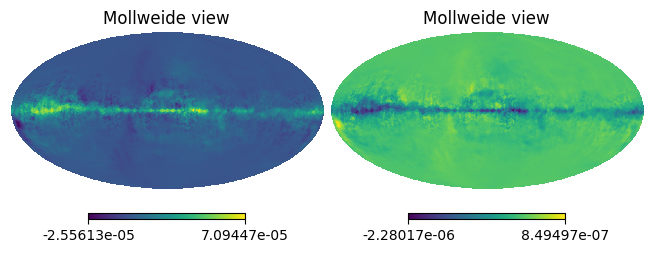

In [21]:
hp.mollview(mapsint["M1-140"][1], sub=121)
hp.mollview((mapsnoint["M1-140"] - mapsint["M1-140"])[1], sub=122)

## Now with a customized bandpass

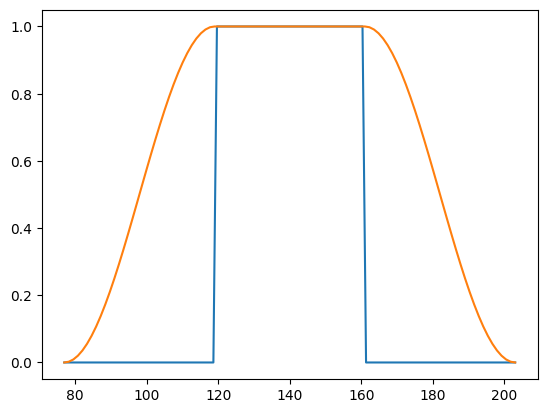

In [22]:
# We change the shape of the bands, in channel1 top-hat in channel2 top-hat with cosine tails

channel1 = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channel1.bandcenter_ghz,
    bandwidth_ghz=channel1.bandwidth_ghz,
    bandtype="top-hat-cosine",
    nsamples_inband=100,
)
channel2 = lbs.FreqChannelInfo.from_imo(
    url="/releases/v1.3/satellite/MFT/M1-140/channel_info", imo=imo
)
channel2.band = band

plt.plot(channel1.band.freqs_ghz, channel1.band.weights, label="Ideal band")
plt.plot(channel2.band.freqs_ghz, channel2.band.weights, label="Ideal band")

In [23]:
# Here we do the comparison
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel1,
)
mapsth = mbs.run_all()[0]

mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    channel_list=channel2,
)
mapsthc = mbs.run_all()[0]

[2023-08-03 08:50:07,233 INFO MPI#0000] generating and saving fg simulations
[2023-08-03 08:50:07,235 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-03 08:50:07,240 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:07,241 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:07,242 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:07,393 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-03 08:50:07,396 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:07,397 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:07,398 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:07,535 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-03 08:50:07,538 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:07,538 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:07,539 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:07,711 INFO MPI#0000] Removing 42/128 points

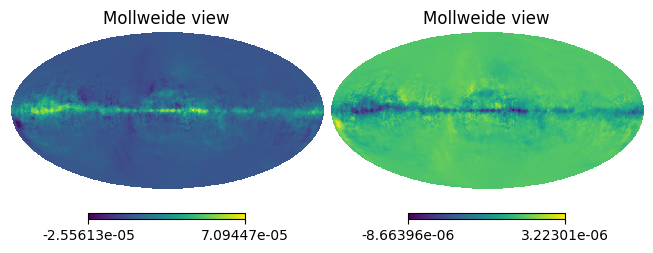

In [24]:
hp.mollview(mapsth["M1-140"][1], sub=121)
hp.mollview((mapsth["M1-140"] - mapsthc["M1-140"])[1], sub=122)

## Scan the sky

In [25]:
# Now we do a simple simulation of 1 hour with 4 detectors
telescope = "MFT"
channel = "M1-140"
detlist = [
    "001_002_060_45A_140_T",
    "001_003_000_75A_140_B",
    "001_003_001_15B_140_T",
    "001_003_002_60A_140_B",
]

In [26]:
start_time = 0.0
imo = lbs.Imo()
sim = lbs.Simulation(
    base_path="./tut01",
    start_time=start_time,
    duration_s=3600,
    random_seed=12345,
)

Can't resample if no sampler is built and/or provided, initializing the sampler and interpolating the band


/home/tomasi/Documents/work/LiteBIRD/simulations/litebird_sim/litebird_sim/bandpasses.py:241: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]
/home/tomasi/Documents/work/LiteBIRD/simulations/litebird_sim/litebird_sim/bandpasses.py:241: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  sp.integrate.quad(b, a=self.freqs_ghz.min(), b=inu)[0]


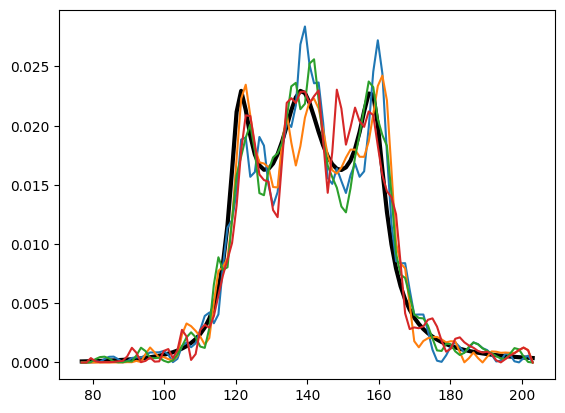

In [27]:
# Load the definition of the instrument (LFT)
sim.set_instrument(
    lbs.InstrumentInfo.from_imo(
        imo,
        f"/releases/v1.3/satellite/{telescope}/instrument_info",
    )
)

channelinfo = lbs.FreqChannelInfo.from_imo(
    imo, f"/releases/v1.3/satellite/{telescope}/{channel}/channel_info"
)

band = lbs.BandPassInfo(
    bandcenter_ghz=channelinfo.bandcenter_ghz,
    bandwidth_ghz=channelinfo.bandwidth_ghz,
    bandtype="cheby",
    nsamples_inband=100,
    normalize=True,
)

plt.plot(band.freqs_ghz, band.weights, lw=3, color="k")

dets = []
for namedet in detlist:
    det = lbs.DetectorInfo.from_imo(
        url=f"/releases/v1.3/satellite/{telescope}/{channel}/{namedet}/detector_info",
        imo=imo,
    )
    det.quat = [0.0, 0.0, 0.0, 1.0]
    det.band = band
    det.fwhm_arcmin *= np.random.normal(1.0, 0.01)
    det.band.weights = band.bandpass_resampling()
    dets.append(det)
    plt.plot(band.freqs_ghz, det.band.weights)

In [28]:
sim.set_scanning_strategy(imo_url=f"/releases/v1.3/satellite/scanning_parameters/")

sim.create_observations(
    detectors=dets,
    n_blocks_det=1,
    n_blocks_time=1,  # blocks different from one if parallelizing
)

In [29]:
params = lbs.MbsParameters(
    make_cmb=False,
    make_fg=True,
    fg_models=["pysm_synch_0", "pysm_freefree_1", "pysm_dust_0"],
    nside=64,
    gaussian_smooth=True,
    bandpass_int=True,
)
mbs = lbs.Mbs(
    simulation=sim,
    parameters=params,
    detector_list=dets,
)
maps = mbs.run_all()[0]

[2023-08-03 08:50:17,740 INFO MPI#0000] generating and saving fg simulations
[2023-08-03 08:50:17,742 INFO MPI#0000] Retrieve data for pysm_2/synch_t_new.fits (if not cached already)
[2023-08-03 08:50:17,746 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:17,747 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:17,749 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:17,886 INFO MPI#0000] Retrieve data for pysm_2/synch_q_new.fits (if not cached already)
[2023-08-03 08:50:17,889 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:17,890 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:17,892 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:18,026 INFO MPI#0000] Retrieve data for pysm_2/synch_u_new.fits (if not cached already)
[2023-08-03 08:50:18,031 INFO MPI#0000] NSIDE = 512
[2023-08-03 08:50:18,032 INFO MPI#0000] ORDERING = RING in fits file
[2023-08-03 08:50:18,033 INFO MPI#0000] INDXSCHM = IMPLICIT
[2023-08-03 08:50:18,263 INFO MPI#0000] Removing 97/100 points

In [30]:
sim.set_hwp(
    lbs.IdealHWP(
        sim.instrument.hwp_rpm * 2 * np.pi / 60,
    ),
)
sim.compute_pointings()

In [31]:
sim.fill_tods(maps)

Text(0, 0.5, 'Signal [K]')

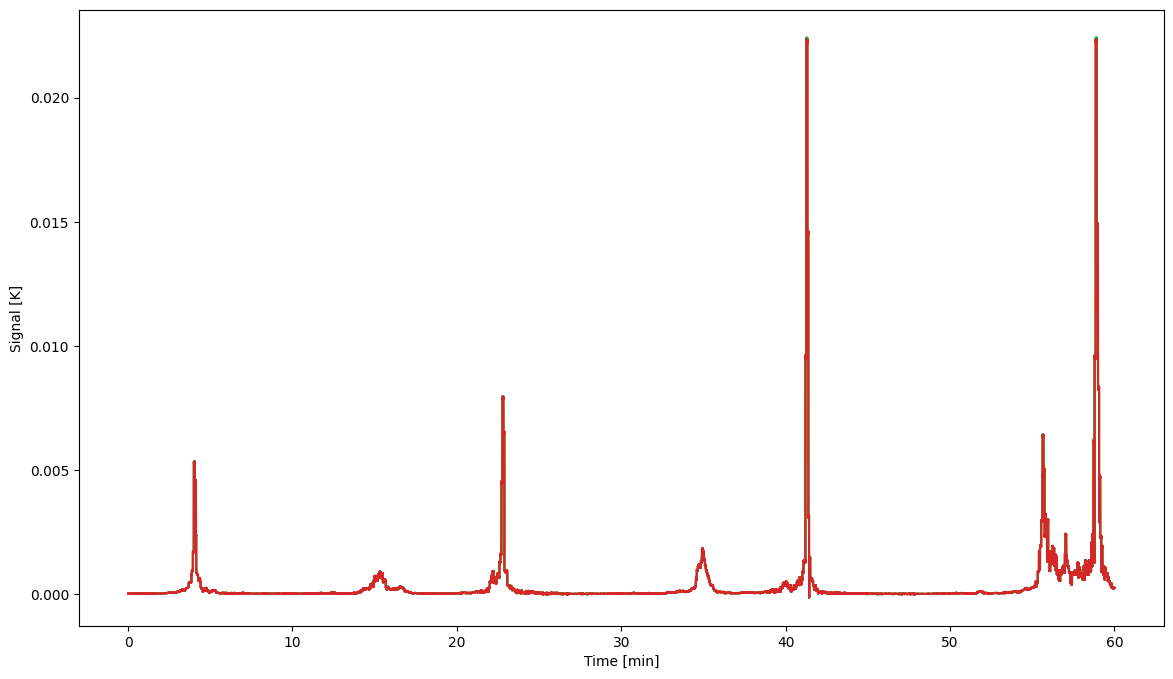

In [32]:
times_min = (sim.observations[0].get_times() - sim.observations[0].start_time) / 60.0
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1])
plt.plot(times_min, sim.observations[0].tod[2])
plt.plot(times_min, sim.observations[0].tod[3])

plt.xlabel("Time [min]")
plt.ylabel("Signal [K]")

Text(0, 0.5, '$\\Delta$ Signal [K]')

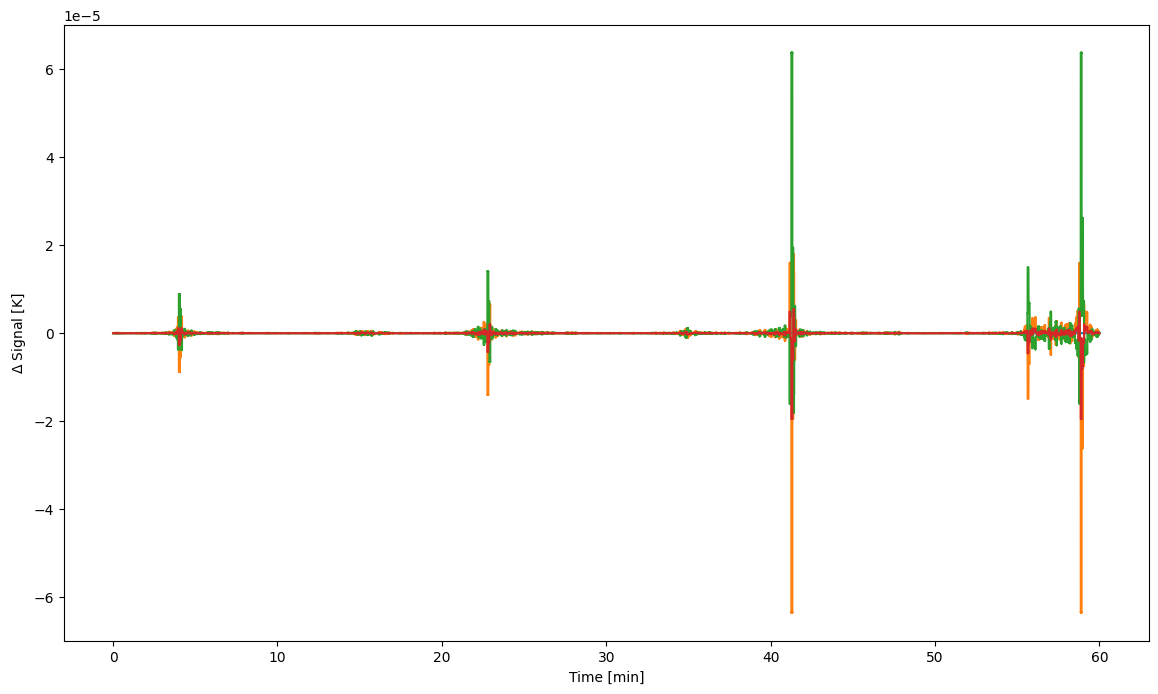

In [33]:
plt.figure(figsize=(14, 8))
plt.plot(times_min, sim.observations[0].tod[0] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[1] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[2] - sim.observations[0].tod[0])
plt.plot(times_min, sim.observations[0].tod[3] - sim.observations[0].tod[0])

plt.xlabel("Time [min]")
plt.ylabel(r"$\Delta$ Signal [K]")